In [ ]:
# example of a CNN for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax

from matplotlib import pyplot
%matplotlib inline

from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [ ]:
# load MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


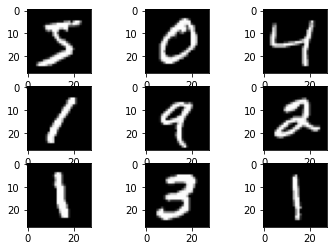

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [ ]:
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))

print('Input shape: ', in_shape)
print('Number of classes: ', n_classes)

Input shape:  (28, 28, 1)
Number of classes:  10


In [ ]:
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# define model
# observe the use of `he_uniform` as kernel initializer
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 9s 4ms/step - loss: 0.5706 - accuracy: 0.8208 - val_loss: 0.0940 - val_accuracy: 0.9716
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1483 - accuracy: 0.9568 - val_loss: 0.0631 - val_accuracy: 0.9796
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1053 - accuracy: 0.9694 - val_loss: 0.0503 - val_accuracy: 0.9833
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0819 - accuracy: 0.9750 - val_loss: 0.0517 - val_accuracy: 0.9824
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0689 - accuracy: 0.9788 - val_loss: 0.0453 - val_accuracy: 0.9842
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0651 - accuracy: 0.9785 - val_loss: 0.0448 - val_accuracy: 0.9838
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0570 - accuracy: 0.9823 - val_loss: 0.0438 - val_accuracy: 0.9859
Epoch 

In [ ]:
# summary of the built model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

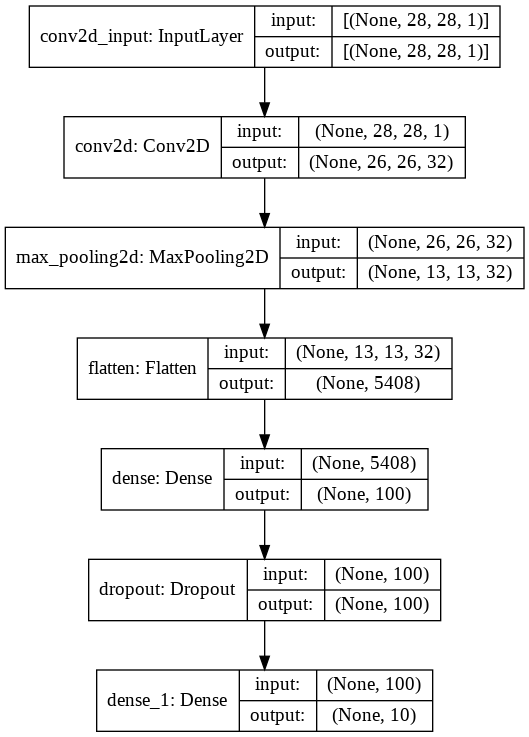

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

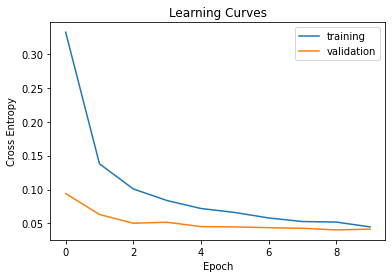

In [ ]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='training')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [ ]:
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print('Accuracy: %.3f' % acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0416 - accuracy: 0.9862
Accuracy: 0.986


In [ ]:
# make a prediction
image = x_train[0]
yhat = model.predict(asarray([image]))
print('Predicted: class = %d' % argmax(yhat))

Predicted: class=5
